In [1]:
import tensorflow as tf

In [ ]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

### Clustering

(aggregate data for 2018)
- street (from geo join)
- num crashes
- num crashes with injury, killed (persons, pedestrians, cyclist, motorist) 2*4=8 features
- street length
- men  (from mvc_person_df)
- women
- contributing factor (top 10 features)
- vehicle type (top 10 features)
- vehicle make (top 10 features) (from mvc_vehicles_df)
- weekday (5 features)
- is weekend
- hour (24 features)


### Features

- hour
- day
- weekday
- is weekend
- week
- month
- killed/injured
- contributing factor 1
- contributing factor 2
- vehicle type 1
- vehicle type 2

In [78]:
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
base_dir = '../'
mvc_crashes = base_dir + 'Motor_Vehicle_Collisions_-_Crashes.csv'
mvc_person = base_dir + 'Motor_Vehicle_Collisions_-_Person.csv'
mvc_vehicles = base_dir + 'Motor_Vehicle_Collisions_-_Vehicles.csv'

# Exploring Crashes

In [4]:
mvc_crashes_df = pd.read_csv(mvc_crashes, header=0, delimiter=",") 

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
pd.set_option('display.max_columns', None)  # Shows all columns

In [15]:
mvc_crashes_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/20/2018,17:25,NaN,NaN,40.805820,-73.909260,POINT (-73.90926 40.80582),BRUCKNER EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3925049,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1,07/09/2018,9:20,NaN,NaN,40.842750,-73.924774,POINT (-73.924774 40.84275),WEST 171 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3938002,Sedan,NaN,NaN,NaN,NaN
2,06/28/2018,12:06,BRONX,10453,40.847180,-73.921350,POINT (-73.92135 40.84718),MONTGOMERY AVENUE,WEST 174 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3931268,Sedan,Taxi,NaN,NaN,NaN
3,07/11/2018,22:15,BROOKLYN,11237,40.698864,-73.909890,POINT (-73.90989 40.698864),NaN,NaN,454 WYCKOFF AVENUE,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3941136,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,06/20/2018,11:50,MANHATTAN,10016,40.748302,-73.978350,POINT (-73.97835 40.748302),EAST 37 STREET,LEXINGTON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3925007,Sedan,Sedan,NaN,NaN,NaN


In [82]:
pd.reset_option('display.max_rows')

CRASH TIME
0      48846
1      26260
2      19887
3      17294
4      20085
5      22266
6      35756
7      49551
8      94363
9      92120
10     85197
11     88520
12     93827
13     98953
14    114658
15    105491
16    123973
17    120755
18    105459
19     85605
20     70681
21     58966
22     53125
23     43487
dtype: int64


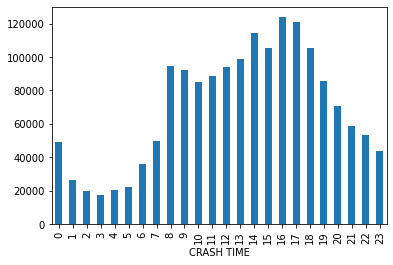

In [155]:
# Number of crashes per hour
column = 'CRASH TIME'
crash_time = mvc_crashes_df[column]
crash_hour = pd.DataFrame(pd.to_datetime(crash_time).dt.hour)  # Extract hours
crash_hour_count = crash_hour.groupby(by=column).size()
# crash_hour_count.sort_values(0, ascending=False, inplace=True)
print(crash_hour_count)
crash_hour_count.plot.bar()

CRASH DATE
10    150977
7     148486
12    146051
9     145724
8     145660
11    144100
5     137958
6     137834
3     136492
1     133418
4     125027
2     123398
dtype: int64


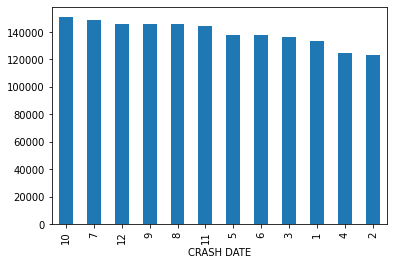

In [132]:
# Number of crashes per month
column = 'CRASH DATE'
crash_date = mvc_crashes_df[column]
crash_month = pd.DataFrame(pd.to_datetime(crash_date).dt.month)  # Extract months
crash_month_count = crash_month.groupby(by=column).size()
crash_month_count.sort_values(0, ascending=False, inplace=True)
print(crash_month_count)
crash_month_count.plot.bar()

CRASH DATE
2018    231560
2017    231007
2016    229827
2015    217694
2019    211471
2014    206033
2013    203735
2012    100541
2020     43257
dtype: int64


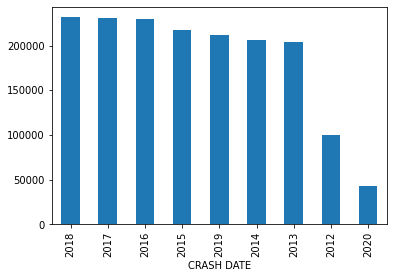

In [134]:
# Number of crashes per year
column = 'CRASH DATE'
crash_date = mvc_crashes_df[column]
crash_year = pd.DataFrame(pd.to_datetime(crash_date).dt.year)  # Extract years
crash_year_count = crash_year.groupby(by=column).size()
crash_year_count.sort_values(0, ascending=False, inplace=True)
print(crash_year_count)
crash_year_count.plot.bar()

In [ ]:
# Number of crashes per week day


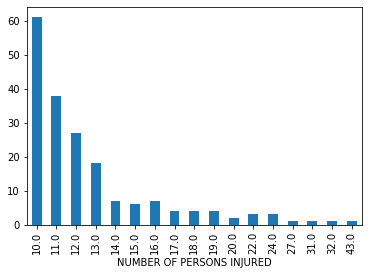

In [53]:
# Outliers
column = 'NUMBER OF PERSONS INJURED'
persons_injured = mvc_crashes_df[mvc_crashes_df[column] >= 10]
persons_injured.groupby([column]).size().plot.bar()

In [45]:
persons_injured_counts = mvc_crashes_df.groupby([column]).size()
persons_injured_counts

NUMBER OF PERSONS INJURED
0.0     1350625
1.0      251360
2.0       47245
3.0       15684
4.0        5926
5.0        2369
6.0        1001
7.0         426
8.0         184
9.0         100
10.0         61
11.0         38
12.0         27
13.0         18
14.0          7
15.0          6
16.0          7
17.0          4
18.0          4
19.0          4
20.0          2
22.0          3
24.0          3
27.0          1
31.0          1
32.0          1
43.0          1
dtype: int64

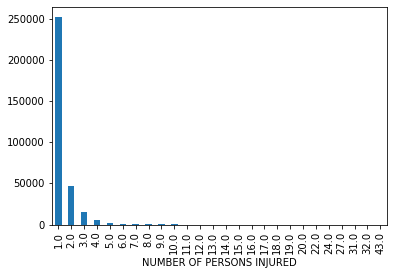

In [54]:
persons_injured_counts[1:].plot.bar()

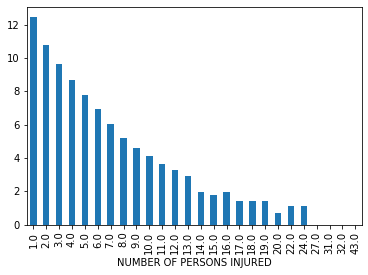

In [57]:
np.log(persons_injured_counts[1:]).plot.bar()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


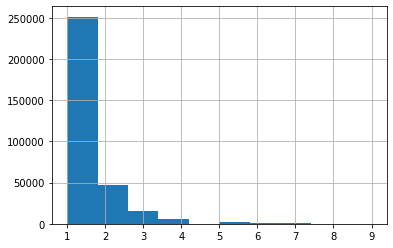

In [41]:
# Histogram of injured people
column = 'NUMBER OF PERSONS INJURED'
persons_injured = mvc_crashes_df[mvc_crashes_df[column] > 0][mvc_crashes_df[column] <10][column]
persons_injured.hist()

In [ ]:
# Histogram of killed people

In [ ]:
# Histogram of injured pedestrians

In [ ]:
# Histogram of killed pedestrians
# XXX: (injured|killed) (motorist|cyclist)

In [60]:
pd.set_option('display.max_rows', None)  # Be careful

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                                              607433
Driver Inattention/Distraction                           316811
Failure to Yield Right-of-Way                             96207
Following Too Closely                                     85332
Backing Unsafely                                          64290
Other Vehicular                                           52993
Fatigued/Drowsy                                           46928
Turning Improperly                                        42460
Passing or Lane Usage Improper                            40544
Passing Too Closely                                       37127
Unsafe Lane Changing                                      32585
Traffic Control Disregarded                               25593
Driver Inexperience                                       24618
Lost Consciousness                                        19724
Pavement Slippery                                         16663
Alcohol In

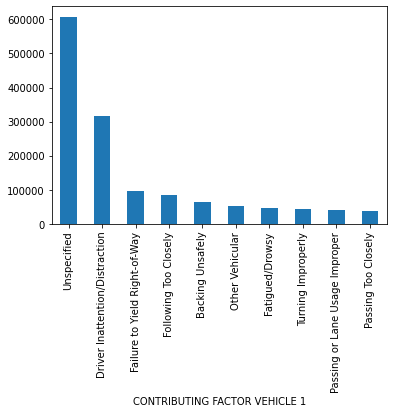

In [73]:
# First factor
column = 'CONTRIBUTING FACTOR VEHICLE 1'
contr_factor_veh_1 = mvc_crashes_df.groupby([column]).size()
contr_factor_veh_1.sort_values(0, ascending=False, inplace=True)
print(contr_factor_veh_1)
contr_factor_veh_1[:10].plot.bar()

CONTRIBUTING FACTOR VEHICLE 2
Unspecified                       1215341
Driver Inattention/Distraction      77177
Other Vehicular                     27645
Failure to Yield Right-of-Way       14491
Following Too Closely               14416
                                   ...   
Windshield Inadequate                   7
Vehicle Vandalism                       6
Listening/Using Headphones              5
1                                       5
Texting                                 3
Length: 61, dtype: int64


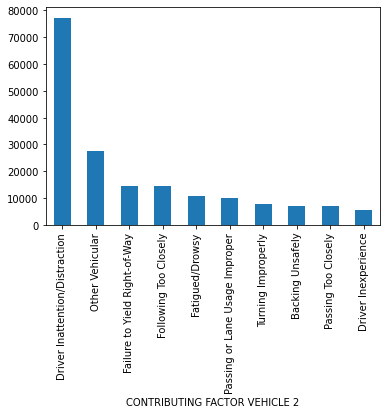

In [154]:
# Second factor
column = 'CONTRIBUTING FACTOR VEHICLE 2'
contr_factor_veh_1 = mvc_crashes_df.groupby([column]).size()
contr_factor_veh_1.sort_values(0, ascending=False, inplace=True)
print(contr_factor_veh_1)
contr_factor_veh_1[1:11].plot.bar()

VEHICLE TYPE CODE 1
PASSENGER VEHICLE                         715236
SPORT UTILITY / STATION WAGON             313500
Sedan                                     186519
Station Wagon/Sport Utility Vehicle       152859
TAXI                                       50670
VAN                                        26540
OTHER                                      23982
PICK-UP TRUCK                              23069
UNKNOWN                                    19929
Taxi                                       19310
SMALL COM VEH(4 TIRES)                     14559
LARGE COM VEH(6 OR MORE TIRES)             14527
BUS                                        14057
Pick-up Truck                              12419
LIVERY VEHICLE                             10481
Box Truck                                   9518
Bus                                         7863
MOTORCYCLE                                  6536
BICYCLE                                     5568
Bike                                        4337


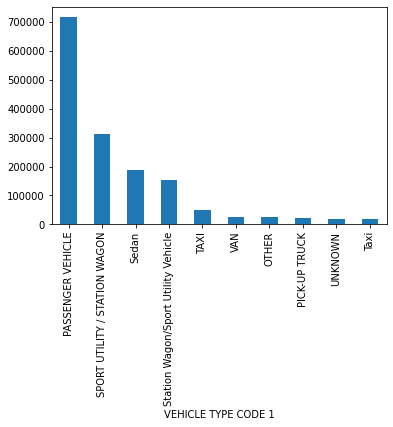

In [75]:
column = 'VEHICLE TYPE CODE 1'
veh_type_code_1 = mvc_crashes_df.groupby([column]).size()
veh_type_code_1.sort_values(0, ascending=False, inplace=True)
print(veh_type_code_1)
veh_type_code_1[:10].plot.bar()

In [6]:
mvc_crashes_df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [160]:
# left-top: (lat, lon) = (40.988810, -74.309432)
# right-bottom: (lat, lon) = (40.518589, -73.667336)
# lat_min = 40.518589
# lat_max = 40.988810
# lon_min = -74.309432
# lon_max = -73.667336

# Exploring Person

In [7]:
mvc_person_df = pd.read_csv(mvc_person, header=0, delimiter=",") 

In [16]:
mvc_person_df.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10252788,4230640,10/25/2019,17:42,0278267c-0b21-470f-8a54-da71b7361448,Occupant,Unspecified,19142923.0,0.0,Not Ejected,Does Not Apply,Does Not Apply,"Any person in the rear of a station wagon, pic...",Unknown,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
1,10253512,4230733,10/10/2019,19:45,81161123-516c-438d-8f29-a107d2783d85,Occupant,Unspecified,19143291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,NaN
2,10250662,4230235,10/26/2019,10:40,b5da9aa6-3230-4203-bbde-3b6f9248ac31,Occupant,Injured,19141868.0,11.0,Not Ejected,Conscious,Entire Body,"Middle rear seat, or passenger lying across a ...",Unknown,NaN,NaN,Whiplash,Passenger,NaN,NaN,F
3,10252894,4231115,10/26/2019,18:45,4ed210b6-678c-4fe3-ae8c-3ecd30eae7aa,Pedestrian,Injured,NaN,30.0,NaN,Conscious,Knee-Lower Leg Foot,Driver,None,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing Against Signal,Fracture - Distorted - Dislocation,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Texting,M
4,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN


In [9]:
mvc_person_df.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')

In [136]:
column = 'PERSON_SEX'
mvc_person_df.groupby([column]).size()

PERSON_SEX
F    1044371
M    2056488
U     347648
dtype: int64

In [141]:
# Person with more than 1 crashes
column = 'PERSON_ID'
# persons_ids = pd.DataFrame(mvc_person_df.groupby([column]).size(), columns=['MULTI_PERSON_ID'])
# persons_ids[persons_ids['MULTI_PERSON_ID'] > 1]

,MULTI_PERSON_ID
PERSON_ID,
1,142787
10,91
11,61
12,40
13,27
14,19
15,15
16,13
17,10


In [143]:
mvc_person_df[mvc_person_df['PERSON_ID'] == '1']

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
5573,2089112,256034,11/23/2012,14:00,1,Pedestrian,Injured,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5609,1466989,81297,09/11/2012,15:00,1,Occupant,Injured,9966578.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5742,2291746,3349004,12/08/2015,9:55,1,Occupant,Injured,14970058.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5944,2290235,3342620,11/26/2015,3:00,1,Occupant,Injured,14957360.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6023,1391521,63608,07/02/2012,17:45,1,Occupant,Injured,9562689.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573701,2242578,3181324,03/05/2015,18:00,1,Occupant,Injured,14603193.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3573708,1987978,222850,03/21/2013,16:45,1,Bicyclist,Injured,12840479.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3573734,1767871,161945,06/13/2013,16:30,1,Occupant,Injured,11623993.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3573778,2265763,3260805,07/19/2015,3:50,1,Occupant,Injured,14792984.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
#mvc_person_df['PERSON_AGE'].plot.bar()

# Exploring Vehicles

In [10]:
mvc_vehicles_df = pd.read_csv(mvc_vehicles, header=0, delimiter=",") 

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
mvc_vehicles_df.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140121,4229438,10/18/2019,18:00,52ae0029-b174-40c9-9ef5-abdd5fdb2704,NJ,Sedan,HYUN -CAR/SUV,NaN,2015.0,West,0.0,NaN,NaN,NaN,Parked,Left Front Bumper,Left Front Bumper,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN


In [12]:
mvc_vehicles_df.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'VEHICLE_ID',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_YEAR', 'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1',
       'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2'],
      dtype='object')

In [152]:
def plot_category_bar(df, column, num_bars=10):
    cat = df.groupby([column]).size()
    cat.sort_values(0, ascending=False, inplace=True)
    print(cat)
    cat[:num_bars].plot.bar()

In [ ]:
#

VEHICLE_MAKE
TOYT -CAR/SUV          292558
HOND -CAR/SUV          197216
NISS -CAR/SUV          170155
FORD -CAR/SUV          141339
CHEV -CAR/SUV           80741
                        ...  
NOVA 60FT LOW ARTIC         1
NOVA ARTIC SBS              1
NOVA BS                     1
emtr trailer                1
znen                        1
Length: 8627, dtype: int64


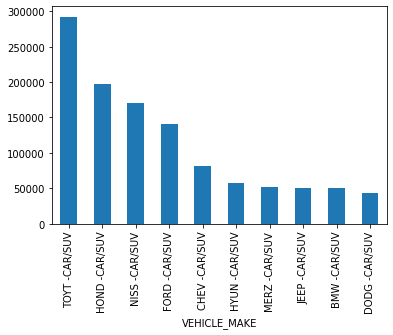

In [150]:
# Car types involved in crash
plot_category_bar(mvc_vehicles_df, 'VEHICLE_MAKE')

In [149]:
# Car year involved in crash
plot_category_bar(mvc_vehicles_df, 'VEHICLE_YEAR')

VEHICLE_YEAR
2016.0    177204
2015.0    176972
2017.0    146032
2014.0    129451
2013.0    107352
           ...  
3000.0         1
3002.0         1
3003.0         1
3024.0         1
1000.0         1
Length: 283, dtype: int64


KeyError: 10.0

VEHICLE_MODEL
TOYT CAM            3046
HOND ACC            1817
NISS ALT            1539
TOYT ZZZ            1507
FORD ZZZ            1214
                    ... 
SHORT SCHOOL BUS       1
SI                     1
SIENNA                 1
SIENNA LE              1
"FLEET"                1
Length: 2437, dtype: int64


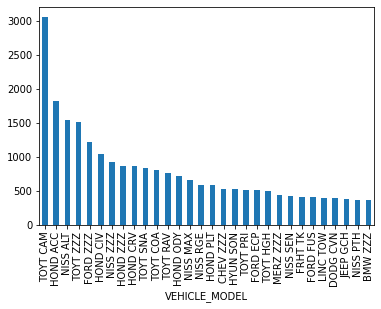

In [153]:
plot_category_bar(mvc_vehicles_df, 'VEHICLE_MODEL', num_bars=30)